In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
features, true_labels = make_blobs(
    n_samples=320,
    centers=4,
    cluster_std=2.9,
    random_state=42
)

In [3]:
features[:5]

array([[ -1.76230149,   8.79839297],
       [ -6.41482063,   4.04737304],
       [-14.26362433,   6.30413381],
       [ -6.91514283,  -9.48214727],
       [-10.72519121,   5.9108593 ]])

In [4]:
true_labels[:5]

array([0, 3, 3, 2, 3])

In [5]:
sc = StandardScaler()
scaled_features = sc.fit_transform(features)

In [6]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=100,
    random_state=42
)

In [7]:
kmeans.fit(scaled_features)

KMeans(init='random', max_iter=100, n_clusters=4, random_state=42)

In [8]:
kmeans.inertia_

113.27441297063969

In [9]:
kmeans.cluster_centers_

array([[ 0.18666046,  0.94592685],
       [ 1.40158264, -0.14911678],
       [-0.59036195, -1.44709017],
       [-0.94883352,  0.60159949]])

In [10]:
kmeans.n_iter_

11

In [11]:
kmeans.labels_[:5]

array([0, 3, 3, 2, 3])

In [12]:
kmeans_kwargs = {
    "init" : "random",
    "n_init" : 10,
    "max_iter" : 100,
    "random_state" : 42
}

sse = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

C:\Users\Dawid\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


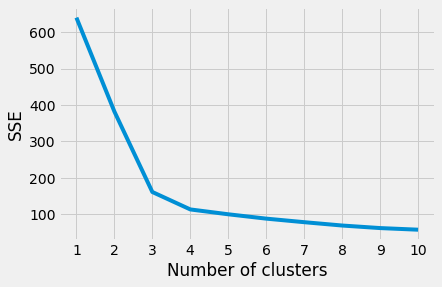

In [13]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [15]:
kl = KneeLocator(
    range(1,11),sse,curve="convex", direction="decreasing"
)
kl.elbow

3

In [16]:
silhouette_coefficients = []

for k in range (2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

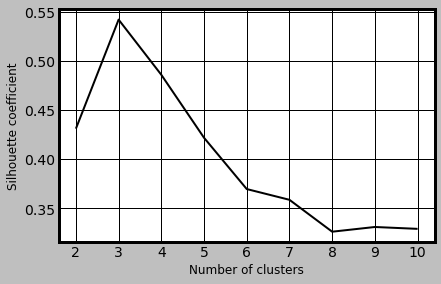

In [19]:
plt.style.use("grayscale")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coefficient")
plt.show()